# Machine Learning in Life Scicence WS 2016 - 2017
## Exercise 1 - Dataset  
a) Create a dataset in R^2 with two classes (positive with target 1 and negative with target 0). Consider 100 datapoints for each class. Let the instances for each class be sampled from a bivariate Gaussian distribution with the same variance.

In [4]:
# Implementation taken from the sklearn website:
# https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.multivariate_normal.html
help (min)

lst1 = [1, 2, 3]
lst2 = [3, 4, 5]
print ( [x * y for x in lst1 for y in lst2])

print ([x for x in lst1 if 4 > x > 1])
print ( [1] * 10)

Help on built-in function min in module builtins:

min(...)
    min(iterable, *[, default=obj, key=func]) -> value
    min(arg1, arg2, *args, *[, key=func]) -> value
    
    With a single iterable argument, return its smallest item. The
    default keyword-only argument specifies an object to return if
    the provided iterable is empty.
    With two or more arguments, return the smallest argument.

[3, 4, 5, 6, 8, 10, 9, 12, 15]
[2, 3]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [5]:
# Importing numpy and matplotlib

import numpy as np
import matplotlib.pyplot as plt


## Multivariate 

In [6]:
#Settings
## Creating dataset here, 100 data points 
# numpy.random.multivariate_normal(mean, cov[size])
# Draw random samples from multivariate normal distribution
mean = [0, 0]
cov = [[0.7,0.5 ], [0.5, 0.5]] # diagonal variance 
n = 100 # number of points 
#Diagonal covariance means that points are oriented along x or y-axis

In [7]:
#Example taking from the website of sklearn
# Here we are considering "X" is for multivariate

x = np.random.multivariate_normal(mean, cov, n )
y = []

for (x1,x2) in x:
    if x1 >= 0 and x2 >= 0:
        y.append(1)
    else:
        y.append(0)



In [8]:
# Before plotting separate +ve and -ve values

positive = [ (x1,x2) for (x1,x2) in x if x1 >= 0 and x2 >= 0]
negative = [ (x1,x2) for (x1,x2) in x if x1 < 0 or x2 < 0 ]

#print(positive)
#print (len(positive))

positive= np.asarray(positive)
size =  int(positive.size/2)
positive= positive.reshape(size,2)


negative= np.asarray(negative)
size =  int(negative.size/2)
negative= negative.reshape(size,2)

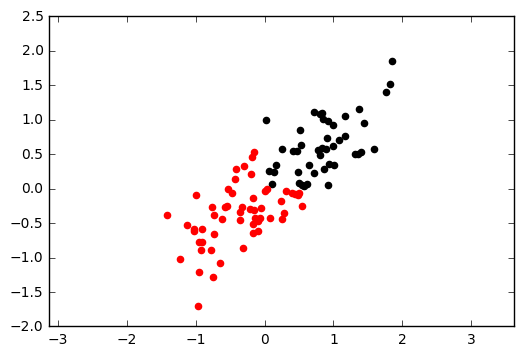

In [9]:
plt.scatter(positive[:,0], positive[:,1], color='black')
#plt.plot(testX, predictY, color='blue', linewidth=3)
plt.scatter(negative[:,0], negative[:,1], color='red')


plt.axis('equal')
plt.show()

In [10]:
#Apply Linear Model on different type of distributions
# Split the data into training/testing sets
trainX =x[:-20] # take 80 sample dataset as a Training
testX = x[-20:] # take 20 sample datset for testing


# Split target also into training/ testing sets
trainY =  y[:-20]
testY =   y[-20:]


## Exercise 2 - Linear Model
a) Write the code to compute a Linear classification model. Apply it to the dataset created in Exercise 1. Plot the predicted class for a regular grid in R^2. 

In [40]:
from sklearn import linear_model

#Using Linear Model 
print ('Linear Model Starts Here:')

#Intialize
regr = linear_model.LinearRegression()
#help(regr.fit)

# Fit
regr.fit(trainX, trainY);

# The Coefficients
print ('Coefficients:', regr.coef_)

#Predict
predictY = regr.predict(testX)


#The mean squared error
print("Mean squared error: %.2f" % np.mean((predictY) - testY) **2  ) # (y^ - y)^2

#Explained variance score: 1 is perfect
print ('Variance score: %.2f' % regr.score(testX, testY))





Linear Model Starts Here:
Coefficients: [ 0.28703027  0.31470515]
Mean squared error: 0.01
Variance score: 0.63


13
13


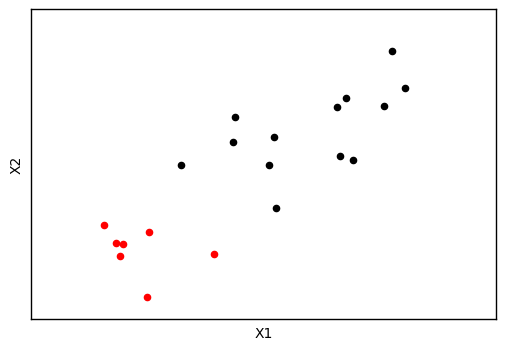

In [28]:
# This is because we are drawing it in 2d, must be drawn in 3D for better visualization
# Plot outputs



X1 = []
X2 = []
X3 = []
X4 = []
i = 0;
for (y) in predictY:
    if y > 0:
        X1.append(testX[i,0])
        X2.append(testX[i,1])
    else:
        X3.append(testX[i,0])
        X4.append(testX[i,1])
    i = i + 1   

print (len(X1))
print (len(X2))

plt.scatter(X1, X2,  color='black')

plt.scatter(X3, X4,  color='red')

#plt.plot(testX[:,0], predictY, color='blue',        linewidth=3)
plt.xlabel('X1')
plt.ylabel('X2')
plt.xticks(())
plt.yticks(())

plt.show()


#### This is because we are drawing it in 2d, must be drawn in 3D for better visualization

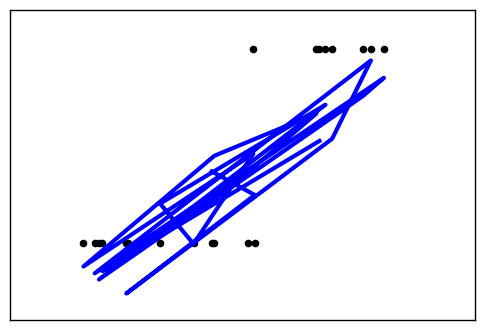

In [15]:
# This is because we are drawing it in 2d, must be drawn in 3D for better visualization
# Plot outputs
plt.scatter(testX[:,0], testY,  color='black')
plt.plot(testX[:,0], predictY, color='blue',
         linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()



In [43]:
# Checking accuracy of the classifier
from sklearn.metrics import accuracy_score
predict_y = []
for (x) in predictY:
    if x > 0:
        predict_y.append(1)
    else:
        predict_y.append(0)
accuracy_score(testY,predict_y)

0.75

## Exercise 3 - kNN Model
a) Write the code to compute a KNN model. Apply it to the dataset created in Exercise 1. Plot the predicted class for a regular grid in R^2. 

In [23]:
from sklearn.neighbors import KNeighborsClassifier


classifier = KNeighborsClassifier(n_neighbors = 2)
classifier.fit(trainX,trainY)

predictions = classifier.predict(testX)
# Checking accuracy of the classifier
from sklearn.metrics import accuracy_score
accuracy_score(testY,predictions)



1.0